# Project: Medical Appointments No Shows Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset has information on 110.527 medical appointments in Brazil. The main focus is to know whether certain features play a part in patients showing up for appointments or not.
Below are the features of this dataset:

**PatientId** indicates the id that identifies each patient.

**AppointmentID** indicates the id that identifies each appointment.

**Gender** indicates the patient's gender (Female 'F' or Male 'M').

**ScheduledDay** tells us on what day the patient set up their appointment.

**AppointmentDay** when will the appointment take place.

**Age** tells how old is the patient.

**Neighborhood** indicates the location of the hospital.

**Scholarship** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

**Hipertension** the patient has hipertension or not.

**Diabetes** the patient is with diabetes or not.

**Alcoholism** the patient consumes alcohol or not.

**Handcap** the patient is handicapped or not and the number of disabillities the have.

**SMS_received** the patient received a SMS or not.

**No-show** Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

Checking the data in this dataset, checking the features to see which I will use in my analysis and which I may end up dropping

The questions, I would like to explore are:
1. Does the waiting period play a part in a patient showing up?
2. Does gender play a part on whether a patient shows up?
3. Does sending an SMS to patients increase the chances of them showing up?
4. Does having a scholarship affect whether a patient shows up?

In [1]:
#Loading packages used 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The column names seem to be good enough to work with in my analysis. Can be better so I will rename them for uniformity.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


ScheduledDay and AppointmentDay datatypes are object but should be datetime.

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921800e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.query("Age == -1")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


It seems as though there was an error when input an entry in the age column since we have an age of -1. 

In [6]:
df.query("Age == 115")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,31963211613981,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,31963211613981,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,31963211613981,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,31963211613981,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,748234579244724,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

PatientId is duplicated and this points to the fact that one patient can have several appointments. The appointment day seems quite unique and may point to the fact that different patients may have appointments at the same time with different doctors. This feature may thus not be needed in our analysis and will be dropped.

In [8]:
df.shape

(110527, 14)

In [9]:
df.duplicated().sum()

0

There seems to be no duplicates in the dataset but looking carefully at the dataset and more specifically for PatientID '31963211613981' the first 2 AppointmentDay and ScheduleDay seem to have been entered wrongly since they are at the same time.

In [10]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The dataset has no null values.

In [11]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

Patients' disabilities seem to vary in severity from a value of 0 to 4 as the highest. 

### Data Cleaning

First I am going to rename the columns to achieve some uniformity. I will make all column names lowercase.

The below code will fisrt rename the below specified columns and then make the column names all lowercase and replace '-' with '_'

In [12]:
df.rename(columns={'ScheduledDay':'Scheduled_Day','AppointmentDay':'Appointment_Day','Hipertension': 'Hypertension', 'Handcap': 'Handicap'},
          inplace=True)
df.rename(columns=lambda x: x.lower().replace("-","_"), inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Convert the features that specify dates to datetime datatypes.

In [13]:
# Convert the 'scheduled_day' and 'appointment_day' columns to datetime data type
df[['scheduled_day', 'appointment_day']] = df[['scheduled_day', 'appointment_day']].apply(pd.to_datetime)
df.dtypes

patientid                        int64
appointmentid                    int64
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
handicap                         int64
sms_received                     int64
no_show                         object
dtype: object

In [14]:
#Check to see the proportions of no_show vs the ones who showed up
df['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

Drop 'appointmentid' since it plays no part in our analysis

In [15]:
df.drop(['appointmentid'] , axis=1, inplace=True)
df.head(1)

,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Drop the row where the age is '-1' since it seems to have been a wrong entry

In [16]:
df = df[df.age != -1]
df.shape

(110526, 13)

Drop the rows for person with age = 115 and has same entries for both scheduled_day and appointment_day

In [17]:
#First we get the rows for patients with age = 115 and then drop the duplicates in both the scheduled_day and appointment_day columns
age_115 = df.query('age == 115')
age_115 = age_115.drop_duplicates(subset=['scheduled_day', 'appointment_day'], keep ='first')
age_115

,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
63912,31963211613981,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,31963211613981,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,31963211613981,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No
97666,748234579244724,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [18]:
# First extract the rowss with age not equal to 115
df = df.query('age != 115')
#Concatinating the df with that of age_115 gotten after dropping the duplicates
df = pd.concat([df, age_115])
df.shape                

(110525, 13)

We then create a new column with timedeltas of the appointment_day and scheduled_day

In [19]:
df['waiting_period']=df['appointment_day']-df['scheduled_day']
df.head()

,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_period
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52
1,558997776694438,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33
2,4262962299951,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56
3,867951213174,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29
4,8841186448183,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37


Since we can't have a waiting period on the negative, we drop the rows with negative values in the waiting_period column.

In [20]:
df = df[df['waiting_period'].dt.days >= 0]
df.shape

(71958, 14)

In [21]:
df.describe(include='all')

C:\Users\marko\AppData\Local\Temp\ipykernel_1424\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
C:\Users\marko\AppData\Local\Temp\ipykernel_1424\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_period
count,7.195800e+04,71958,71958,71958,71958.000000,71958,71958.000000,71958.000000,71958.000000,71958.000000,71958.000000,71958.000000,71958,71958
unique,NaN,2,68666,27,NaN,80,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,F,2016-04-25 17:17:46+00:00,2016-06-06 00:00:00+00:00,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,NaN,48069,22,3073,NaN,5213,NaN,NaN,NaN,NaN,NaN,NaN,51437,NaN
first,NaN,NaN,2015-11-10 07:13:56+00:00,2016-04-29 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-06-07 19:03:57+00:00,2016-06-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.452621e+14,NaN,NaN,NaN,38.501501,NaN,0.092707,0.208900,0.074724,0.025320,0.020012,0.493093,NaN,15 days 03:50:21.661469190
std,2.535681e+14,NaN,NaN,NaN,22.923807,NaN,0.290023,0.406525,0.262948,0.157097,0.154029,0.499956,NaN,16 days 11:46:39.729234902
min,3.921800e+04,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0 days 03:16:20
25%,3.967778e+12,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,3 days 15:14:52.500000


<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 (Does the waiting period play a part in a patient showing up?)

Let's first convert the waiting_period into integers so that we will be able to easily plot it

In [22]:
df['waiting_period']=df['waiting_period'].dt.days
df['waiting_period'].describe()

count    71958.000000
mean        14.642194
std         16.494381
min          0.000000
25%          3.000000
50%          8.000000
75%         21.000000
max        178.000000
Name: waiting_period, dtype: float64

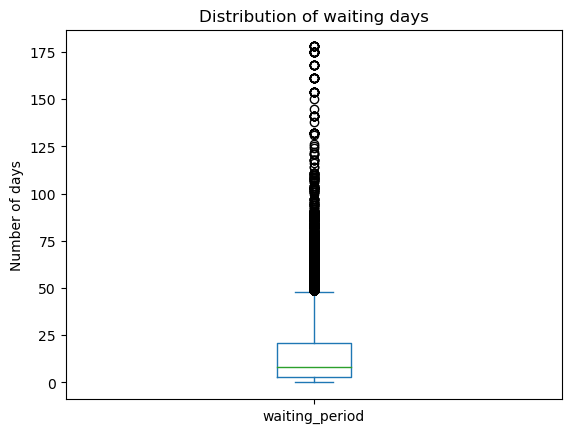

In [23]:
df['waiting_period'].plot(kind= 'box');
#plt.xlabel('Number of patients')
plt.ylabel('Number of days')
plt.title('Distribution of waiting days')
plt.show();

We can see that from the above boxplot, most patients tend not to show up between day 0 and day 50. After which we have several who still don't show up after day 50 of waiting. This can be further illustrated by the right-skewed histogram below: 

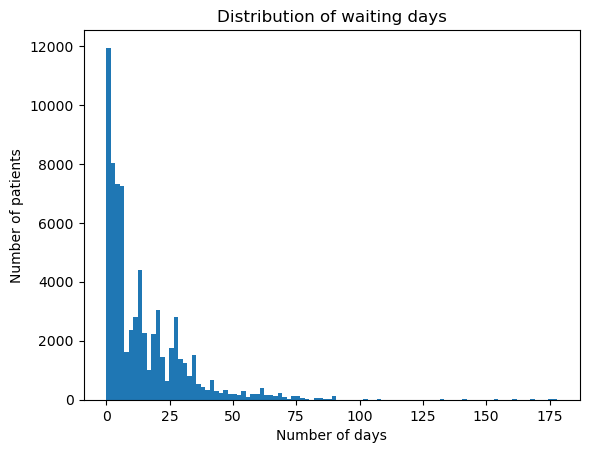

In [24]:
df['waiting_period'].plot(kind= 'hist',bins = 100);
plt.xlabel('Number of days')
plt.ylabel('Number of patients')
plt.title('Distribution of waiting days')
plt.show();

Let's convert the Yes or No values in the no_show column to 1 and 0 respsectively in order to be able to plot it later.

In [25]:
df['no_show'] = df['no_show'].map({'Yes': 1, 'No': 0})
df.head()

,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_period
5,95985133231274,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0,1
6,733688164476661,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,1
7,3449833394123,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,1
9,78124564369297,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0,1
10,734536231958495,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,0,1


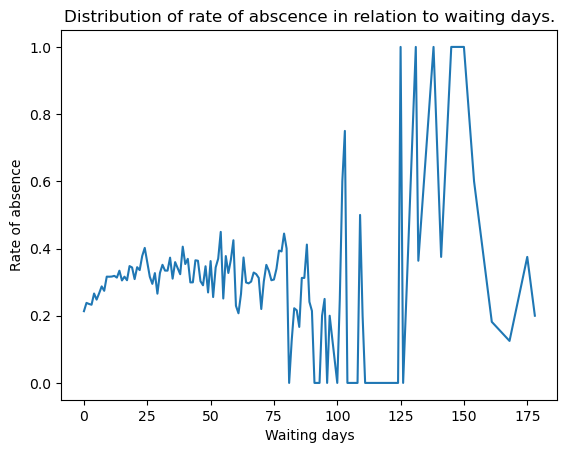

In [26]:
df['no_show'].groupby(df['waiting_period']).mean().plot.line()
plt.xlabel('Waiting days')
plt.ylabel('Rate of absence')
plt.title('Distribution of rate of abscence in relation to waiting days.')
plt.show();

We can see from the above line graph that the rate of absentism increases from day 0 to day 50 of waiting, after which the behavior becomes a bit erratic, with a drop in the no show but it again peaks at around day 75. In general, we can conclude that the longer a patient waits, the more likely they may miss their appointments.

### Research Question 2 (Does gender play a part on whether a patient shows up?)

In [27]:
#First check the proportion of gender on how they showed up for appointment
df['no_show'].groupby(df['gender']).value_counts()

gender  no_show
F       0          34396
        1          13673
M       0          17041
        1           6848
Name: no_show, dtype: int64

In [28]:
# We'll first create masks for the female and male patients
male = df[df['gender']=='M']
female = df[df['gender']=='F']
female.shape

(48069, 14)

We then create pie charts for both male and female patients showing proportions of show and no show in both.

Function to help plot pie charts across the notebook:

In [29]:
def plot_pie(df1, col1, col2, title, explode, autopct, labels):
    df1.groupby(col1)[col2].value_counts().plot.pie(shadow=True, explode = explode, autopct=autopct, labels = labels)
    plt.axis('equal')
    plt.title(title)
    plt.legend();

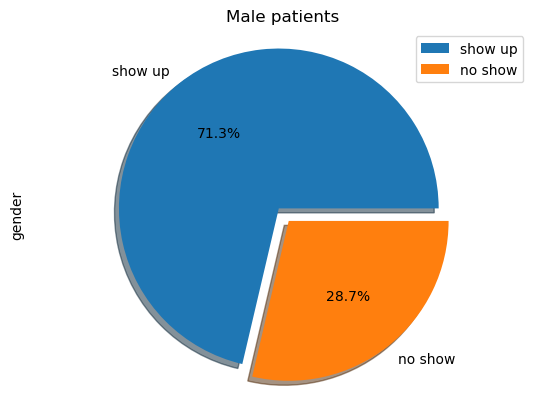

In [30]:
column1 = 'no_show'
column2 = 'gender'
explode = (0.1, 0.0)
labels = ['show up','no show'] 
autopct='%1.1f%%'
plot_pie(male, column1, column2, 'Male patients', explode, autopct, labels)

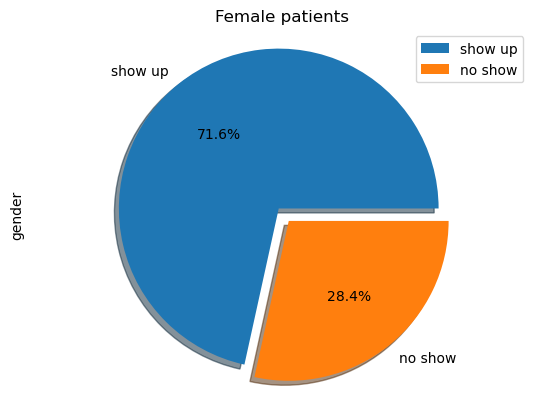

In [31]:
column1 = 'no_show'
column2 = 'gender'
explode = (0.1, 0.0)
labels = ['show up','no show'] 
autopct='%1.1f%%'
plot_pie(female, column1, column2, 'Female patients', explode, autopct, labels)

From the above pie charts, we can see that the gender of a patient doesn't seem to impact whether they are going to show up or not. The percentage of male and female patients that didn't show up is 70.6% and 71.1% respectively. These are almost identical percentages in both categories of gender and as such we can't conclusively say that gender plays a role in whether a patient shows up or not.

### Research Question 3 (Does sending an SMS to patients increase the chances of them showing up?)

First I will create masks for patients that recieved smses and those who didn't

In [32]:
sms_yes=df.query('sms_received == 1')
sms_no=df.query('sms_received == 0')
sms_yes.head()

,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_period
11,7542951368435,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,1,2
15,99948393975,F,2016-04-26 08:47:27+00:00,2016-04-29 00:00:00+00:00,15,NOVA PALESTINA,0,0,0,0,0,1,0,2
18,17135378245248,F,2016-04-26 10:54:18+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,1,0,0,0,0,1,0,2
22,863229818887631,M,2016-04-25 13:29:16+00:00,2016-04-29 00:00:00+00:00,13,CONQUISTA,0,0,0,0,0,1,1,3
25,5819369978796,M,2016-04-26 15:04:17+00:00,2016-04-29 00:00:00+00:00,46,CONQUISTA,0,1,0,0,0,1,0,2


We then created pie charts showing the proportions of show vs no_show in both sets where sms was recieved and not

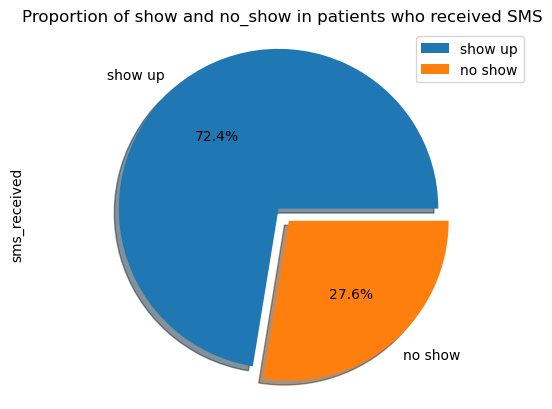

In [33]:
column1 = 'no_show'
column2 = 'sms_received'
explode = (0.1, 0.0)
labels = ['show up','no show'] 
autopct='%1.1f%%'
plot_pie(sms_yes, column1, column2, "Proportion of show and no_show in patients who received SMS", explode, autopct, labels)

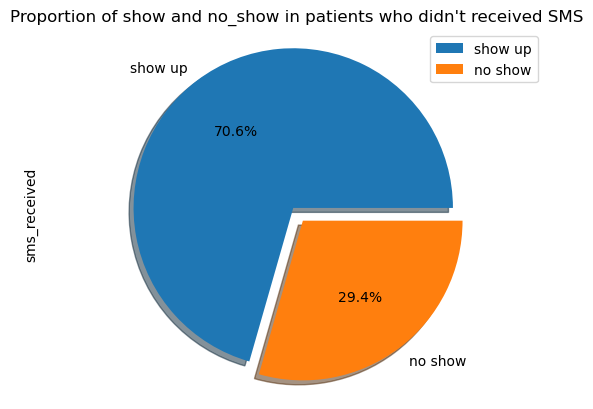

In [34]:
column1 = 'no_show'
column2 = 'sms_received'
explode = (0.1, 0.0)
labels = ['show up','no show'] 
autopct='%1.1f%%'
plot_pie(sms_no, column1, column2, "Proportion of show and no_show in patients who didn't received SMS", explode, autopct, labels)

From the above pie charts we can't exhaustively deduce that receiving an SMS plays a huge role on whether a patient shows up or not. This is because the proportions of show and no_show are almost the same in both sets and as such this may not be a good feature to use in predicting this behavior.

### Research Question 4 (Does having a scholarship affect whether a patient shows up?)

We again will create masks for patient with scholarships and those without

In [35]:
df.head()

,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_period
5,95985133231274,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0,1
6,733688164476661,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,1
7,3449833394123,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,1
9,78124564369297,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0,1
10,734536231958495,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,0,1


In [36]:
no_scholarship = df.query('scholarship == 0')
with_scholarship = df.query('scholarship == 1')
no_scholarship.head()

,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_period
5,95985133231274,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0,1
6,733688164476661,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,1
7,3449833394123,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,1
9,78124564369297,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0,1
10,734536231958495,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,0,1


In [37]:
no_scholarship.groupby(['scholarship'])['no_show'].value_counts()

scholarship  no_show
0            0          47099
             1          18188
Name: no_show, dtype: int64

In [38]:
with_scholarship.groupby(['scholarship'])['no_show'].value_counts()

scholarship  no_show
1            0          4338
             1          2333
Name: no_show, dtype: int64

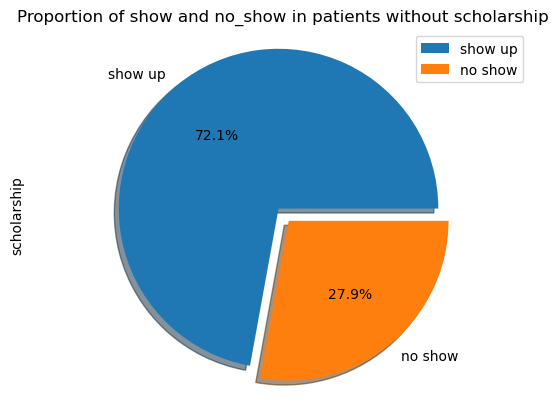

In [39]:
column1 = 'no_show'
column2 = 'scholarship'
explode = (0.1, 0.0)
labels = ['show up','no show'] 
autopct='%1.1f%%'
plot_pie(no_scholarship, column1, column2, 'Proportion of show and no_show in patients without scholarship', explode, autopct, labels)

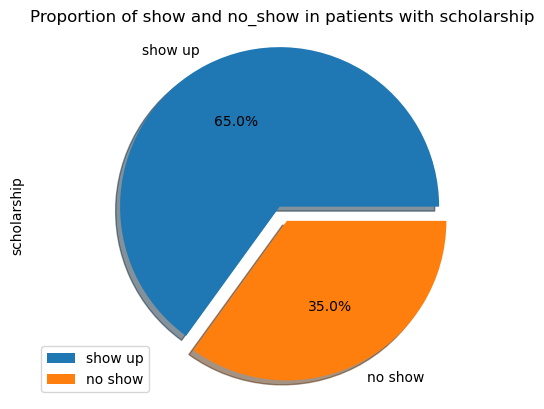

In [40]:
column1 = 'no_show'
column2 = 'scholarship'
explode = (0.1, 0.0)
labels = ['show up','no show'] 
autopct='%1.1f%%'
plot_pie(with_scholarship, column1, column2, 'Proportion of show and no_show in patients with scholarship', explode, autopct, labels)

From the above pie charts we can see that the proportion of patients who didn't show up is slightly higher by 7.2% in the group with scholarships as compared to the group without. We might thus consider this in our analysis but this margin is still not big enough to warrant us to use this feature with confidence in our analysis.

<a id='conclusions'></a>
## Conclusions

From my analyses of the various features/variables with respect to whether a patient shows up or not, below are the deductions I made:
1. We can conclude that the longer a patient waits, the more likely they may miss their appointments.
2. A patient's gender and whether they received an SMS or not are not enough to help us justify their impact on whether a patient shows up or not.
3. Although it's evident, though by a slight margin, that patients without scholarships tend to show up more than those with, this said margin may not be enough to conclusive deduce that this plays a major role in a patient's turn up.

I however found out the below limitations from the dataset used:
* Most of the data turned out to have negative number of waiting days which isn't feasible and may mean there was a lot of erroneous data entry
* The distance to and/or from the hospital isn't available. This might have been a better feature to have to use in our analysis as opposed to the Neighborhood.
* The data covered a short period of time (approximately 7 months)

# References

Below are the links I used for reference during my analysis of this dataset:
* https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html
* https://datatofish.com/string-to-integer-dataframe/
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
* https://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php#:~:text=To%20add%20percentages%20to%20each,percentage%20to%20the%20tenth%20place.&text=This%20gets%20rid%20of%20the%20tilt%20from%20the%20pie%20chart.